In [1]:
import numpy as np
import matplotlib.pyplot as plt

from dataset import EarthMantleDataset
from dataset import read_cdf

In [2]:
file_path = 'D:/EarthMantleConvection/mantle01/spherical001.nc'
x_volume, y_volume, volume_size = read_cdf(file_path, 5, 5, 5, './scalers')
dataset = EarthMantleDataset(x_volume, y_volume, volume_size)

In [3]:
dataset.get_x_volume_size()

torch.Size([7, 205, 184, 364])

In [4]:
for c in range(dataset.get_x_volume_size()[0]):
    volume = dataset.x_volume[c, :, :, :]
    print(volume.mean(), volume.std())

tensor(0.) tensor(0.9740)
tensor(1.1380e-08) tensor(0.9740)
tensor(-5.6901e-10) tensor(0.9740)
tensor(0.) tensor(0.9740)
tensor(2.8450e-10) tensor(0.9740)
tensor(-9.9576e-10) tensor(0.9740)
tensor(-4.9788e-10) tensor(0.9740)


In [5]:
def plot_surfaces(surfaces, channel, max_depth=6):
    fig = plt.figure(figsize=(16, 32))
    
    x_range = surfaces.shape[2]
    y_range = surfaces.shape[3]
    x = np.linspace(0, x_range//10, x_range)
    y = np.linspace(0, y_range//10, y_range)
    
    X, Y = np.meshgrid(x, y)
    # print(X.shape)
    # print(Y.shape)
    
    for i in range(max_depth):
        ax = fig.add_subplot(max_depth//2, 2, i+1, projection='3d')
        ax.plot_surface(X.T, Y.T, surfaces[channel, i, :, :], alpha=1)
    fig.tight_layout()
    plt.show()

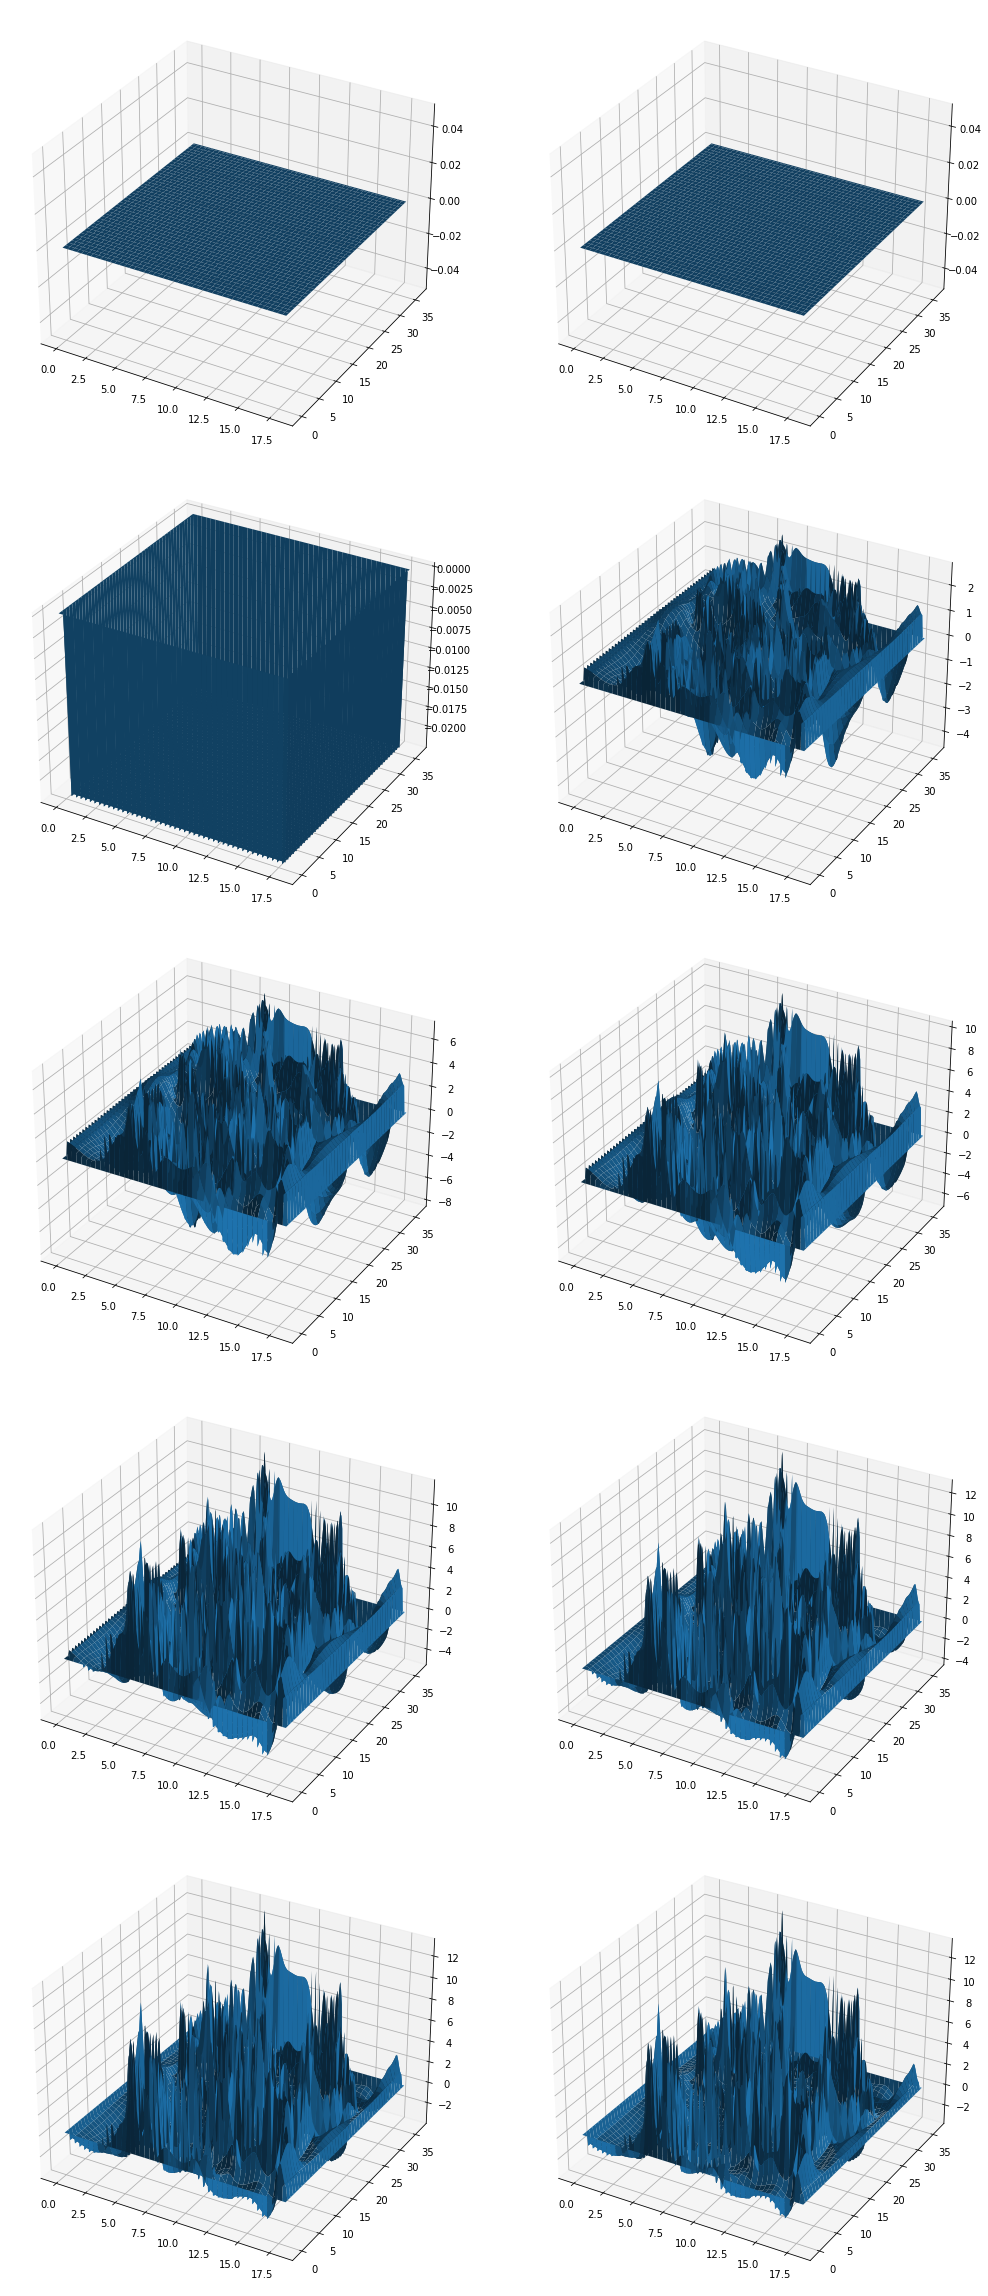

In [6]:
plot_surfaces(dataset.x_volume, 4, 10)